In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

from matplotlib.colors import ListedColormap  

import seaborn as sns

In [2]:
# Importing data and creating a dataframe.
df = pd.read_csv("user-data.csv")
display(df.head())
display(df.dtypes)

,user_id,gender,age,estimated_salary,purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


user_id              int64
gender              object
age                  int64
estimated_salary     int64
purchased            int64
dtype: object

In [3]:
# Extracting independent and dependent variables.
x = df.iloc[:, [2, 3]].values
y = df.iloc[:, 4].values

# Output first five values in both the lists.
print(x[:5])
print(y[:5])

# Independent variables are age and estimated_salary.
# Dependent variable is purchased because it depends on a person's age as well as his/her estimated salary.

[[   19 19000]
 [   35 20000]
 [   26 43000]
 [   27 57000]
 [   19 76000]]
[0 0 0 0 0]


In [4]:
# Splitting the data into training and testing data.
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=0)

In [5]:
std_x = StandardScaler()
x_train = std_x.fit_transform(x_train)
x_test = std_x.transform(x_test)

print("x_train:", x_train[:5], "...")
print("")
print("x_test:", x_test[:5], "...")

x_train: [[ 0.58164944 -0.88670699]
 [-0.60673761  1.46173768]
 [-0.01254409 -0.5677824 ]
 [-0.60673761  1.89663484]
 [ 1.37390747 -1.40858358]] ...

x_test: [[-0.80480212  0.50496393]
 [-0.01254409 -0.5677824 ]
 [-0.30964085  0.1570462 ]
 [-0.80480212  0.27301877]
 [-0.30964085 -0.5677824 ]] ...


In [6]:
model = SVC(kernel="linear", random_state=0)
model.fit(x_train, y_train)

SVC(kernel='linear', random_state=0)

In [7]:
# Predicting the testing dataset results
y_pred = model.predict(x_test)
print(y_pred[:10], "...")

[0 0 0 0 0 0 0 1 0 0] ...


In [8]:
df = pd.DataFrame(y_test, y_pred)
df.head()

,0
0,0
0,0
0,0
0,0
0,0


[[66  2]
 [ 8 24]]


<Axes: >

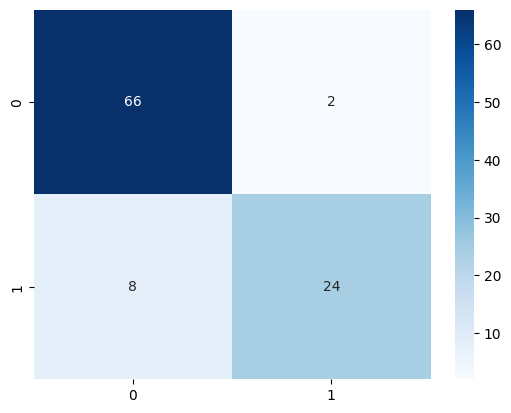

In [9]:
#Creating the Confusion matrix and heatmap
from sklearn.metrics import confusion_matrix  
cm = confusion_matrix(y_test, y_pred)
print(cm)

sns.heatmap(cm, annot=True, cmap="Blues")

In [10]:
acc = accuracy_score(y_test, y_pred)
print("Accuracy:", acc)

Accuracy: 0.9


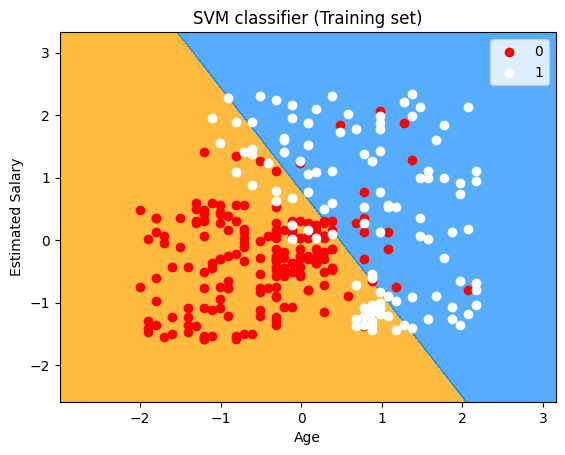

In [13]:
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
import numpy as np

x_set, y_set = x_train, y_train

# Create meshgrid
x1, x2 = np.meshgrid(np.arange(start=x_set[:, 0].min() - 1, stop=x_set[:, 0].max() + 1, step=0.01), 
                     np.arange(start=x_set[:, 1].min() - 1, stop=x_set[:, 1].max() + 1, step=0.01)) 

# Plot the decision boundary using a contour plot
plt.contourf(x1, x2, model.predict(np.array([x1.ravel(), x2.ravel()]).T).reshape(x1.shape), 
             alpha=0.75, cmap=ListedColormap(['#FFA500', '#1E90FF']))  # Orange and DodgerBlue in hex

# Set plot limits
plt.xlim(x1.min(), x1.max())
plt.ylim(x2.min(), x2.max())

# Plot data points with custom colors
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(x_set[y_set == j, 0], x_set[y_set == j, 1], 
                c=[ListedColormap(['red', 'white'])(i)], label=j)

# Add titles and labels
plt.title('SVM classifier (Training set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')

# Add legend
plt.legend()

# Show plot
plt.show()


In [20]:
#Visulaizing the test set result  
x_set, y_set = x_test, y_test  
x1, x2 = np.meshgrid(np.arange(start = x_set[:, 0].min() - 1, stop = x_set[:, 0].max() + 1, step  =0.01), np.arange(start = x_set[:, 1].min() - 1, stop = x_set[:, 1].max() + 1, step = 0.01))  

plt.contourf(x1, x2, model.predict(np.array([x1.ravel(), x2.ravel()]).T).reshape(x1.shape), alpha = 0.75, cmap=ListedColormap(['#FFA500', '#1E90FF']))  # Orange and DodgerBlue in hex
plt.xlim(x1.min(), x1.max())  
plt.ylim(x2.min(), x2.max())  

for i, j in enumerate(np.unique(y_set)):
    plt.scatter(x_set[y_set == j, 0], x_set[y_set == j, 1], c=[ListedColormap(['red', 'white'])(i)], label=j)

plt.title('SVM classifier (Test set)')  
plt.xlabel('Age')  
plt.ylabel('Estimated Salary')  
plt.legend()  
plt.show()  

MemoryError: Unable to allocate 443. GiB for an array with shape (13500200, 4400) and data type float64

In [23]:
import numpy as np
import pandas as pd
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns


    user_id  gender  age  estimated_salary  purchased
0  15624510       1   19             19000          0
1  15810944       1   35             20000          0
2  15668575       0   26             43000          0
3  15603246       0   27             57000          0
4  15804002       1   19             76000          0
Confusion Matrix:
[[57  1]
 [ 6 16]]
Accuracy: 0.91


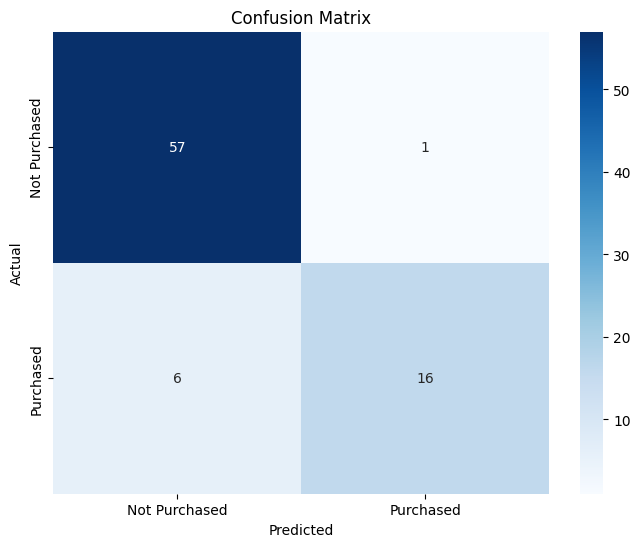

In [24]:

# Load the dataset
data = pd.read_csv('user-data.csv')

# Handle categorical variables
label_encoder = LabelEncoder()
for column in data.select_dtypes(include=['object']).columns:
    data[column] = label_encoder.fit_transform(data[column])

# data structured
print(data.head())

# Extract features and target variable
X = data.drop(['user_id','purchased'], axis=1).values  # Features
y = data['purchased'].values                 # Target variable

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Feature scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train the SVM classifier
classifier = SVC(kernel='linear', random_state=0)
classifier.fit(X_train, y_train)

# Predict the test set results
y_pred = classifier.predict(X_test)

# Evaluate the model using confusion matrix and accuracy
cm = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)

# Print the confusion matrix and accuracy
print("Confusion Matrix:")
print(cm)
print(f'Accuracy: {accuracy:.2f}')

# Visualize the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Purchased', 'Purchased'], yticklabels=['Not Purchased', 'Purchased'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()